# Generate and Visualise Image Permutations
I filmed footge of the tags stuck to a board and I'm testing out different ways I can add extra variance to the image data such as:
- Rotations
- Zoom
- Noise

In [ ]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import glob

np.random.seed(0)

In [3]:
def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 30, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image
    
def rotate_image(image):
    rotated_images = []
    for angle in range(45, 360, 45):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)
    
def change_brightness_contrast(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 70)
    decrease_brightness = norm_image(image_int32 - 70)
    increase_contrast = norm_image(image_int32 * 1.4)
    decrease_contrast = norm_image(image_int32 * 0.4)
    
    return [increase_brightness, decrease_brightness, increase_contrast, decrease_contrast]

def translate_image(image):
    translated_images = []
    for t in [(0,25, 0,25, 1,26, 1,26), (3,28, 3,28, 2,27, 2,27), (1,26, 3,28, 2,27, 2,27), (3,28, 1,26, 2,27, 2,27)]:
        full_size = np.zeros((28, 28), dtype=np.uint8)
        cv2.randn(full_size, 50, 3)
        full_size[t[0]:t[1], t[2]:t[3]] = image[t[4]:t[5], t[6]:t[7]]
        translated_images.append(full_size)
    return translated_images

def resize_image(image):
    i_size = cv2.resize(image,(32, 32), interpolation = cv2.INTER_CUBIC)
    d_size = cv2.resize(image,(24, 24), interpolation = cv2.INTER_AREA)
    zoomed_in = i_size[2:30, 2:30]
    zoomed_out = np.zeros((28, 28), dtype=np.uint8)
    cv2.randn(zoomed_out, 40, 2)
    zoomed_out[2:26, 2:26] = d_size
    return [zoomed_in, zoomed_out]

def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[4:24, 4:24] = image[4:24, 4:24]
    return full_size

def processing_pipeline(image):
    outputs = [image, occlude_edges(image), add_noise(mean_smooth(image), 'u')]
    outputs.extend(change_brightness_contrast(image))
    
    for r in rotate_image(image):
        for z in resize_image(r):
            outputs.append(z)
                
    return outputs

def view(image):
    plt.figure()
    plt.imshow(image, cmap = cm.Greys_r)

In [4]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/Classified/*/')

class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        class_images_dict[image_class_name].append(image)

In [5]:
{k: len(class_images_dict[k]) for k in class_images_dict.keys()}

{'0': 5586,
 '1': 5581,
 '1_Note': 5731,
 '2': 5519,
 '2_Note': 5275,
 '3': 5875,
 '3_Lines': 5491,
 '4': 5538,
 '5': 5672,
 '6': 5321,
 '7': 5399,
 '8': 5377,
 'AA': 5673,
 'Ampersand': 5642,
 'Ankh': 5974,
 'Arrow_Hollow': 6237,
 'Arrow_Line': 5412,
 'Asterisk': 5694,
 'BB': 5237,
 'Circle_Cross': 4395,
 'Circle_Half': 5088,
 'Circle_Line': 5711,
 'DD': 5132,
 'Diamond': 5738,
 'Dot': 5980,
 'Dot_3_Lines': 6168,
 'EE': 5223,
 'GG': 5583,
 'HH': 5207,
 'Hash': 5729,
 'Heart': 5700,
 'JJ': 5735,
 'KK': 4903,
 'Leaf': 5986,
 'MM': 6158,
 'NN': 5731,
 'Necklace': 5971,
 'Omega': 4326,
 'PP': 10066,
 'Peace': 5342,
 'Pillars': 5775,
 'Plane': 5728,
 'Plant': 5649,
 'Power': 5703,
 'Queen': 8816,
 'Question_Mark': 5665,
 'RR': 4904,
 'Radioactive': 5822,
 'SS': 8329,
 'Scissors': 5100,
 'TT': 4505,
 'Tadpole': 5758,
 'Triangle': 6134,
 'Trident': 5789,
 'UU': 5413,
 'Umbrella': 5414,
 'VV': 5517,
 'XX': 5563,
 'ZZ': 5431,
 'a': 5535,
 'b': 5561,
 'e': 5509,
 'f': 5382,
 'g': 5479,
 'h': 56

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


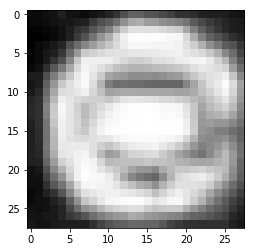

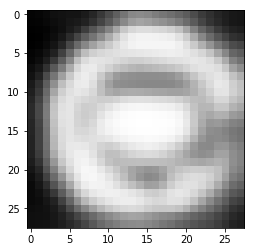

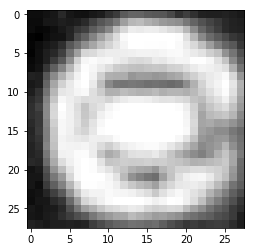

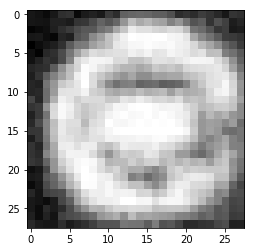

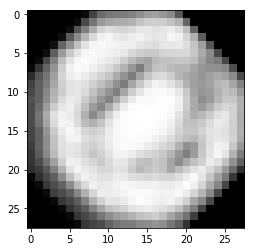

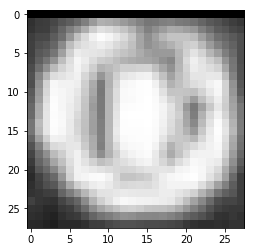

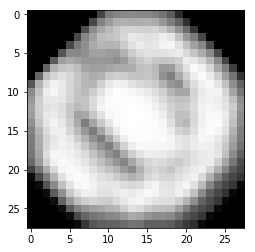

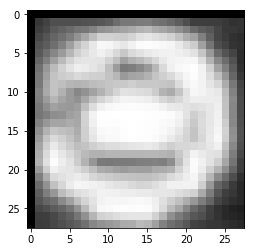

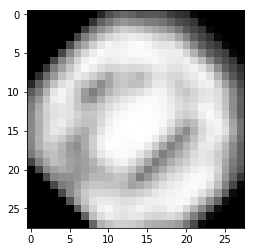

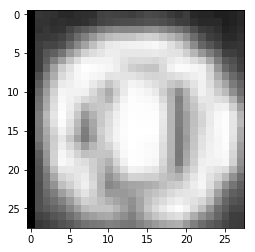

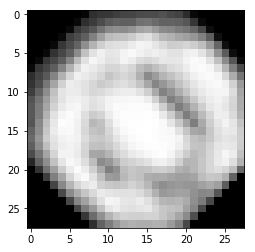

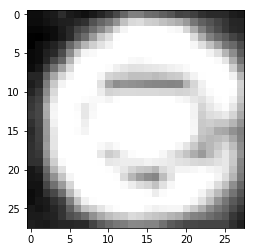

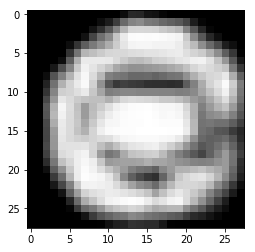

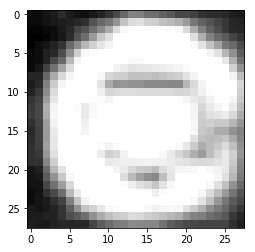

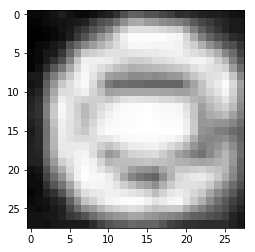

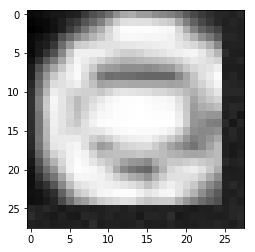

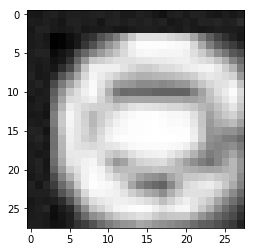

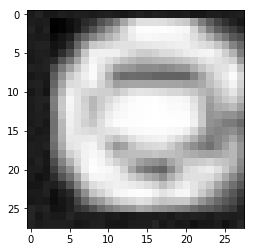

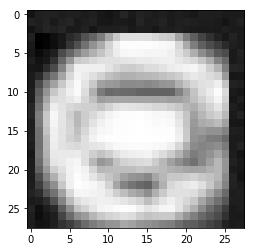

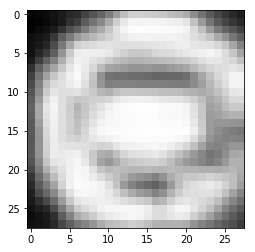

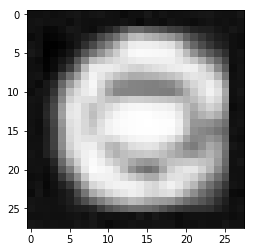

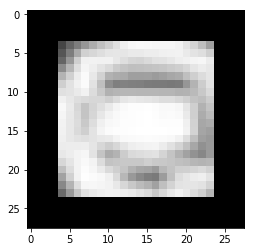

In [6]:
zero_image = copy.deepcopy(class_images_dict['0'][0])
view(zero_image)

view(mean_smooth(zero_image))

view(add_noise(zero_image, 'n'))
view(add_noise(zero_image, 'u'))

for i in rotate_image(zero_image):
    view(i)
    
for c in change_brightness_contrast(zero_image):
    view(c)

for t in translate_image(zero_image):
    view(t)
    
for z in resize_image(zero_image):
    view(z)
    
view(occlude_edges(zero_image))

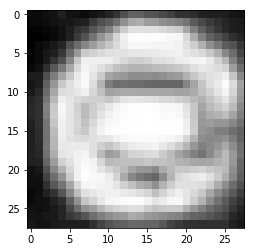

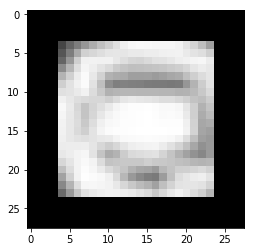

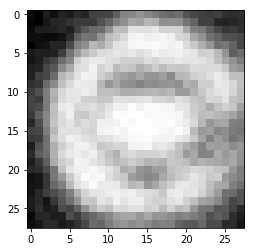

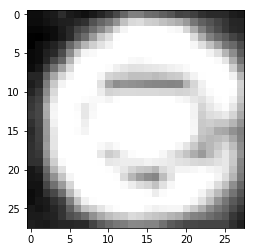

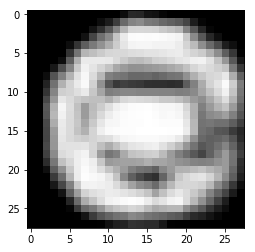

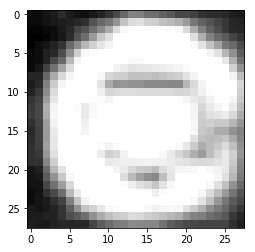

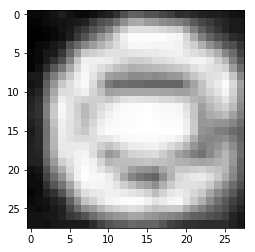

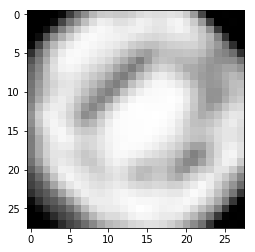

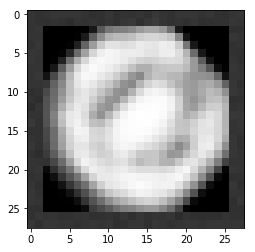

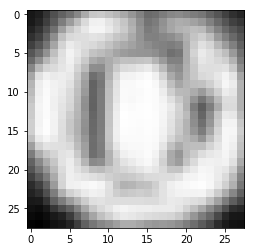

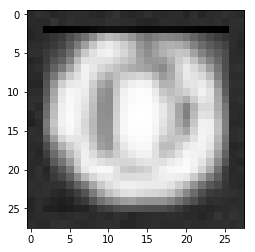

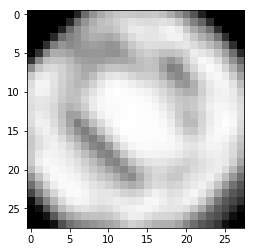

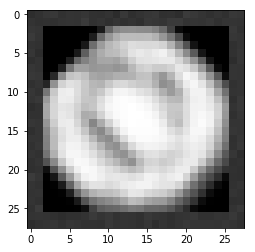

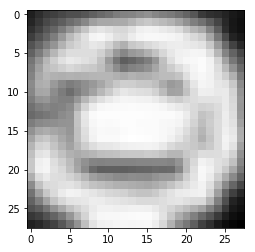

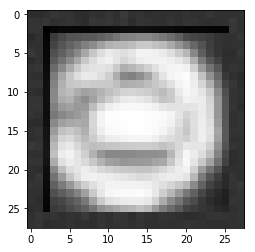

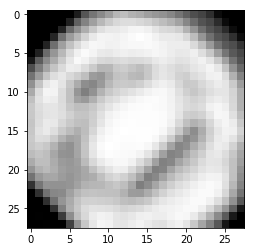

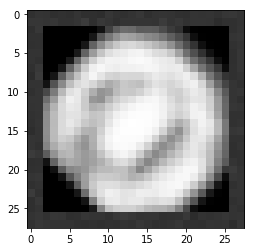

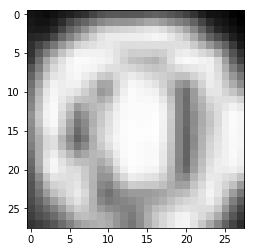

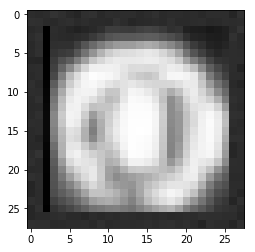

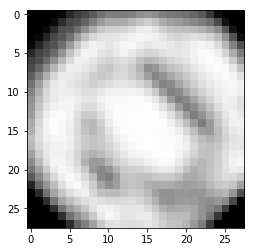

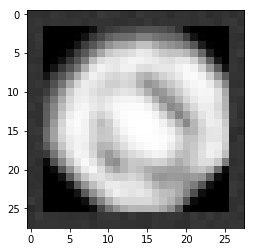

In [7]:
for im in processing_pipeline(zero_image):
    view(im)

In [2]:
import numpy as np
np.random.seed(123)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000, 10)


In [11]:
print(set(y_train))
#print(Y_train[0])
#print(len(set(y_train)))

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
